# Integrated Project 1

<b>The purpose of the project is to characterize successful video games (in terms of sales) in order to maximize sales on an online video game sales site.</b>

In [1]:
!pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 2.5 MB/s eta 0:00:01     |█████████████████████████████   | 10.3 MB 2.5 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import sidetable
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14169,The Night of the Rabbit,PC,2013.0,Adventure,0.00,0.03,0.0,0.00,75.0,7.5,NaN
2344,MLB 2001,PS,2000.0,Sports,0.49,0.34,0.0,0.06,NaN,NaN,NaN
10253,Smash Court Tennis 3,X360,2007.0,Sports,0.08,0.02,0.0,0.01,55.0,tbd,E
6904,Covert Ops: Nuclear Dawn,PS,2000.0,Action,0.13,0.09,0.0,0.02,NaN,NaN,NaN
8223,Street Fighter: The Movie,PS,1995.0,Fighting,0.10,0.07,0.0,0.01,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
games.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


## Introduction

The dataset contains data of video games. The purpose of the project is to determine whether certain parameters affect sales in different regions.
You can see that some of the data is very partial, the reason is probably the collection of information from different sources.

At first glance, the data set shows a number of problems:
The columns User_Score, Critic_Score and Rating  have many missing values.
the column User_score contains non-numeric values- "tbd"

## Preperation of the data

### Replacing column names

In [8]:
games.columns= games.columns.str.lower()

In [9]:
games.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Processing missing values

In [10]:
games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


<b>There are 6 columns with missing values:</b><br> critic_score<br>rating<br>user_score<br>year_of_release<br>name<br>genere 

#### name

In [11]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These 2 rows has 5 columns with missing values. Even I fill them in, most of the data of this rows will be unreliable. Therfore I have decided to drop them.

In [12]:
games = games.dropna(subset=['name'])

In [13]:
games.query('name.isnull()')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### year_of_release

My assumption is that the operating years of different platforms vary from one platform to another. If this assumption is correct, it will be possible to fill in the missing values in this column by platforms.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


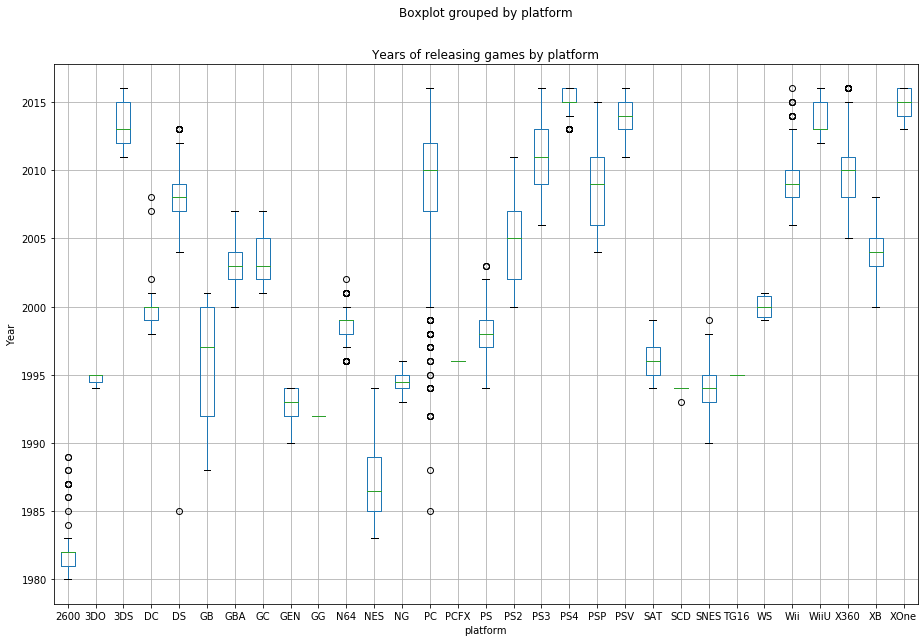

In [14]:
games.boxplot(by='platform', column='year_of_release', figsize=(15,10))
plt.title('Years of releasing games by platform')
plt.xlabel('platform')
plt.ylabel('Year')
plt.show()

The boxplot above shows that my assumption is correct

In [15]:
#games['year_of_release'] = games['year_of_release'].fillna(games.groupby('platform')['year_of_release'].transform('median'))

In [16]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#checking that all the cells of 'year_of_release' are filled
games.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
games.year_of_release.describe()

count    16713.000000
mean      1974.175253
std        252.700771
min         -1.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [19]:
games['year_of_release'] = games['year_of_release'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
games.year_of_release.value_counts()

 2008    1427
 2009    1426
 2010    1255
 2007    1197
 2011    1136
 2006    1006
 2005     939
 2002     829
 2003     775
 2004     762
 2012     653
 2015     606
 2014     581
 2013     544
 2016     502
 2001     482
 1998     379
 2000     350
 1999     338
 1997     289
-1        269
 1996     263
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
Name: year_of_release, dtype: int64

####  Rating

In [21]:
games.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

n order to fill in the missing values in column rating I used the following method: Each value I replaced with a numerical value in ascending order according to the level of suitability for the whole population, with 1 suitable for everyone, and 5 suitable for the lowest number of people.
I inserted the numeric values into a new column: 'rating_int', and filled in the remaining missing values by a median. In the analysis phase I will use the new column.

In [22]:
def rating_to_int(rating):
    
    if rating =='E' or rating =='K-A' or rating =='EC' :
        return '1'
    elif rating == 'E10+':
        return '2'
    elif rating == 'T':
        return '3'
    elif rating == 'M':
        return '4'
    elif rating == 'AO':
        return '5'
    else:
        return np.nan


In [23]:
games['rating_int'] = games['rating'].apply(rating_to_int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_int
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [25]:
games.rating_int.value_counts()

1    4001
3    2961
4    1563
2    1420
5       1
Name: rating_int, dtype: int64

In [26]:
#games['rating_int'] = games['rating_int'].fillna(games.groupby('genre')['rating_int'].transform('median'))


In [27]:
games['rating'] = games['rating'].fillna('no info')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
games.rating.value_counts()

no info    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [29]:
games.rating_int.value_counts()

1    4001
3    2961
4    1563
2    1420
5       1
Name: rating_int, dtype: int64

In [30]:
#games['rating_int'] = games['rating_int'].astype(int)

In [31]:
games.rating_int.value_counts()

1    4001
3    2961
4    1563
2    1420
5       1
Name: rating_int, dtype: int64

#### User score and critic score

In filling these columns I took the following flatness: First I treated values "tbd" as missing values. I have no way of knowing if  the missing values (or some of them) are "tbd" so it would not be right to treat them differently.
I checked if there was a correlation between the users score and the critic score, and used it to fill in the missing values in the critic score.

In [32]:
games.loc[games['user_score']=="tbd", 'user_score'] =np.nan

/home/jovyan/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
games.user_score.describe()

count     7590
unique      95
top        7.8
freq       324
Name: user_score, dtype: object

In [34]:
games['user_score'] = games['user_score'].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
games.user_score.describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [36]:
games_filtered = games.query('user_score.notnull() and critic_score.notnull()')

In [37]:
games_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_int
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1


In [38]:
games_filtered['ratio'] = games_filtered['critic_score'] / games_filtered['user_score'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
games_filtered.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_int,ratio
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,9.500000
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,9.879518
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,10.000000
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1,10.470588
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1,8.787879


In [40]:
games_filtered.ratio.describe()

count    7017.000000
mean       10.107999
std         3.169620
min         3.033708
25%         8.764045
50%         9.750000
75%        10.759494
max       120.000000
Name: ratio, dtype: float64

In [41]:
#games['user_score'] = games['user_score'].fillna(games.groupby('platform')['user_score'].transform('median'))

In [42]:
games['user_score'] = games['user_score'].fillna(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
games.user_score.describe()

count    16713.000000
mean         2.689888
std          4.169887
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

There are still missing values in this column, so I fill the rest with the median of all the games.

In [44]:
#games['user_score']  = games['user_score'].fillna(games['user_score'].median())

In [45]:
games.user_score.describe()

count    16713.000000
mean         2.689888
std          4.169887
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [46]:
#games['critic_score'] = games['critic_score'].fillna(np.round(games['user_score'] * 9.75))

In [47]:
games['critic_score'] = games['critic_score'].fillna(-1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
games['critic_score'] = games['critic_score'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
games.critic_score.describe()

count    16713.000000
mean        33.064920
std         36.299815
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

In [50]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  rating_int       9946 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.7+ MB


<div class="alert alert-block alert-succes">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
tbd can be nan, yep! :) 

</div>
    
    
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~As for name and year we cannot fill scores by median/mean/etc. Score is very specific value. We can fill by unreal number (-1, for example) or leave missing values.~ 
    
~Could you change it? :)~ 

</div>
    

### Adding 'total sales' column

In [51]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_int,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no info,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no info,NaN,31.38


## Analysis

<b>Look at how many games were released in different years. Is the data for every period significant?</b>

In [53]:
years = games[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by='year_of_release').reset_index()

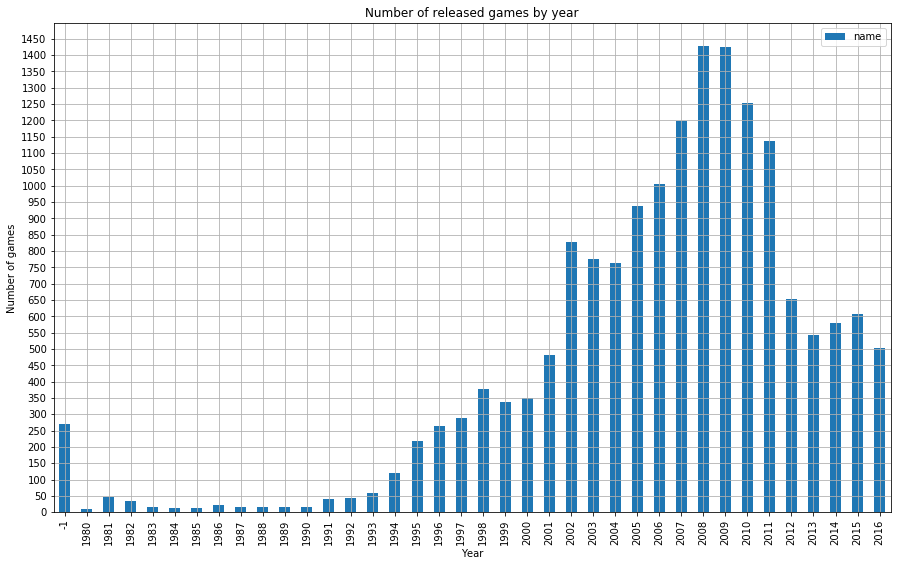

In [54]:
years.plot(kind='bar', x='year_of_release', y='name', figsize=(15,9),  grid=True)
plt.locator_params(axis='y', nbins=50)
plt.title('Number of released games by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()           

As can be seen, not all periods are equal in importance. Around 1995, there was a significant increase in the number of games released, in line with the technology and the Internet that developed in those years.

<b>Look at how sales varied from platform to platform. </b>

In [55]:
platforms = games[['total_sales','platform']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

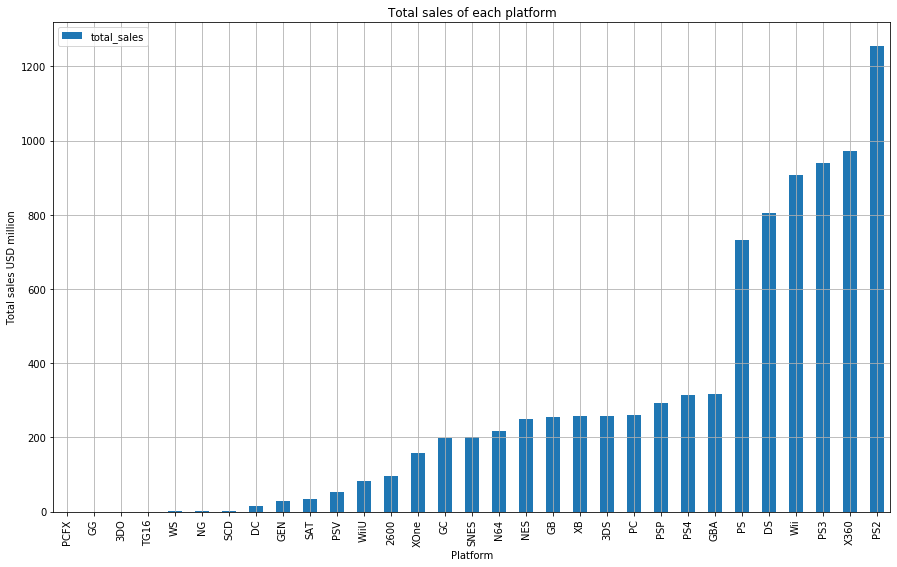

In [56]:
platforms.plot(kind='bar', x='platform', y='total_sales', figsize=(15,9),  grid=True)
plt.title('Total sales of each platform')
plt.xlabel('Platform')
plt.ylabel('Total sales USD million')
plt.show()           

The top 6 platforms are more than twice as profitable as the other platforms.

<b>Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?</b>

In [57]:
most_profitable_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [58]:
platforms_year_total_sales = games[games.platform.isin(most_profitable_platforms)].groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()

In [59]:
platforms_year_total_sales.head()

,platform,year_of_release,total_sales
0,DS,-1,3.34
1,DS,1985,0.02
2,DS,2004,17.27
3,DS,2005,130.14
4,DS,2006,119.81


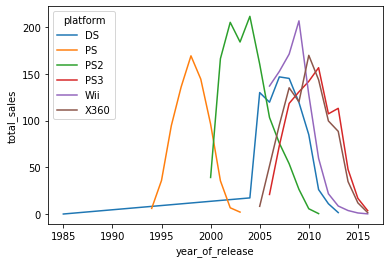

In [60]:
sns.lineplot(data=platforms_year_total_sales.query('year_of_release != -1') , x='year_of_release', y='total_sales', hue='platform')
plt.show()

According to the graph, the platform has an average lifespan of 10 years: 5 years of growth and 5 years of decline to 0 profitability 

In [61]:
platforms_year_total_sales.query('year_of_release == 2016')

,platform,year_of_release,total_sales
47,PS3,2016,3.60
59,Wii,2016,0.18
72,X360,2016,1.52


PS3 is the most popular platform in 2016.

In [62]:
platforms_year_total_sales.query('platform == "PS3"')

,platform,year_of_release,total_sales
36,PS3,-1,8.31
37,PS3,2006,20.96
38,PS3,2007,73.19
39,PS3,2008,118.52
40,PS3,2009,130.93
41,PS3,2010,142.17
42,PS3,2011,156.78
43,PS3,2012,107.36
44,PS3,2013,113.25
45,PS3,2014,47.76


PS3 has its peak i n 2013. 

<b>Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.</b>

In [63]:
filltered_years = games.query('year_of_release > 2012')

I want to focus on the good years of the platforms, so the range of years I filtered is 5 years

<b>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.<b>

In [64]:
filltered_years_pivot = filltered_years.groupby(['platform', 'year_of_release'])[ 'total_sales'].agg('sum').reset_index().pivot(index='platform', columns='year_of_release', values='total_sales')
filltered_years_pivot

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


All platforms that have been active within the last five years are in decline.

<b>Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? </b>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


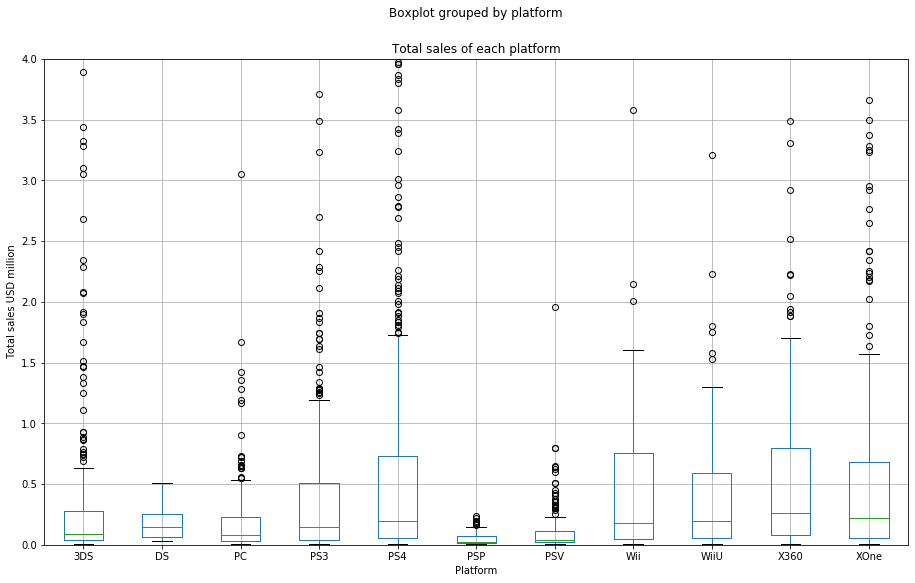

In [65]:
filltered_years.boxplot(by='platform', column='total_sales' ,figsize=(15,9))
plt.title('Total sales of each platform')
plt.xlabel('Platform')
plt.ylim(0,4)
plt.ylabel('Total sales USD million')
plt.show() 

the difference in sales are not significant.

<b>What about average sales on various platforms?</b>

In [66]:
filltered_years.groupby('platform')['total_sales'].mean()

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64

<b>Describe your findings</b>

Some of the platforms have very successful games that are exceptional in sales and are outliers, and this causes a change on average. In terms of median, there is no substantial change.

<b>Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.</b>

<b>X360:</b>

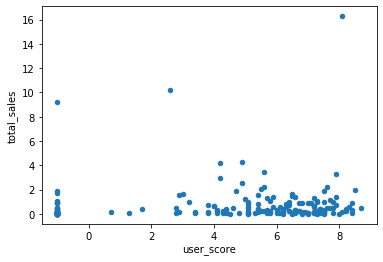

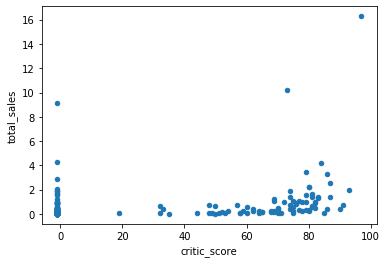

In [67]:
filltered_years.query('platform == "X360"').plot.scatter(x='user_score', y='total_sales')
filltered_years.query('platform == "X360"').plot.scatter(x='critic_score', y='total_sales')
plt.show()

In [68]:
scores_sales = filltered_years.query('platform == "X360"')[['user_score', 'critic_score', 'total_sales']]
scores_sales.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.539589,0.071864
critic_score,0.539589,1.000000,0.245636
total_sales,0.071864,0.245636,1.000000


The scores do not affect the sales.

<b>Keeping your conclusions in mind, compare the sales of the same games on other platforms</b>

<b>XOne:</b>

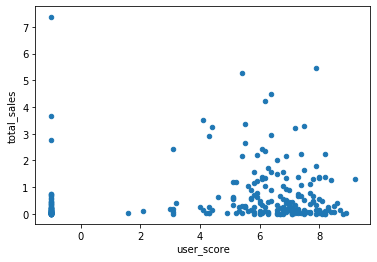

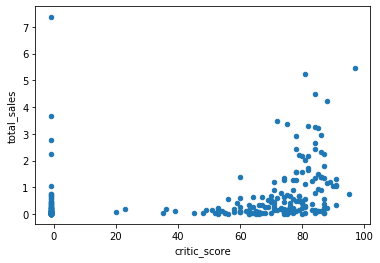

In [69]:
filltered_years.query('platform == "XOne"').plot.scatter(x='user_score', y='total_sales')
filltered_years.query('platform == "XOne"').plot.scatter(x='critic_score', y='total_sales')
plt.show()

In [70]:
scores_sales = filltered_years.query('platform == "XOne"')[['user_score', 'critic_score', 'total_sales']]
scores_sales.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.781040,0.121712
critic_score,0.781040,1.000000,0.273782
total_sales,0.121712,0.273782,1.000000


<b>WiiU:</b>

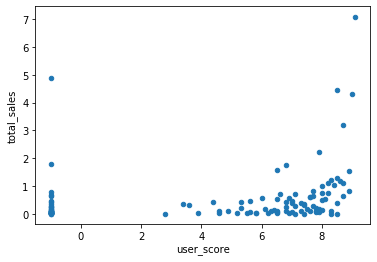

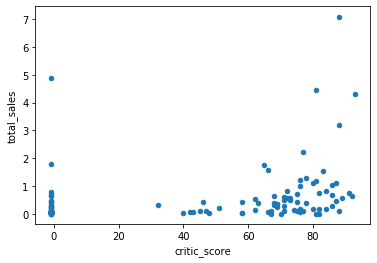

In [71]:
filltered_years.query('platform == "WiiU"').plot.scatter(x='user_score', y='total_sales')
filltered_years.query('platform == "WiiU"').plot.scatter(x='critic_score', y='total_sales')
plt.show()

In [72]:
scores_sales = filltered_years.query('platform == "WiiU"')[['user_score', 'critic_score', 'total_sales']]
scores_sales.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.828502,0.240404
critic_score,0.828502,1.000000,0.293181
total_sales,0.240404,0.293181,1.000000


<b>PS4:</b>

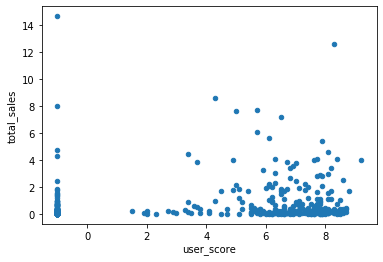

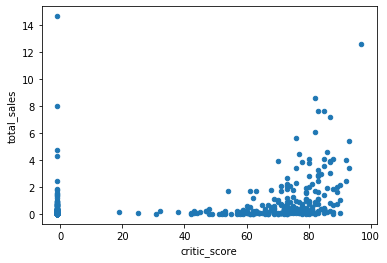

In [73]:
filltered_years.query('platform == "PS4"').plot.scatter(x='user_score', y='total_sales')
filltered_years.query('platform == "PS4"').plot.scatter(x='critic_score', y='total_sales')
plt.show()

In [74]:
scores_sales = filltered_years.query('platform == "PS4"')[['user_score', 'critic_score', 'total_sales']]
scores_sales.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.907449,0.115961
critic_score,0.907449,1.000000,0.226526
total_sales,0.115961,0.226526,1.000000


<b>PS3:</b>

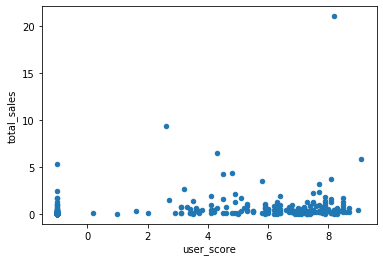

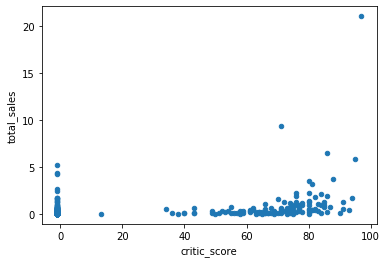

In [75]:
filltered_years.query('platform == "PS3"').plot.scatter(x='user_score', y='total_sales')
filltered_years.query('platform == "PS3"').plot.scatter(x='critic_score', y='total_sales')
plt.show()

In [76]:
scores_sales = filltered_years.query('platform == "PS3"')[['user_score', 'critic_score', 'total_sales']]
scores_sales.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.701051,0.205859
critic_score,0.701051,1.000000,0.278462
total_sales,0.205859,0.278462,1.000000


Other platforms show similar conclusions

<b>Take a look at the general distribution of games by genre.</b>

In [77]:
genres = games[['genre', 'name']].groupby('genre').count().sort_values(by='genre').reset_index()

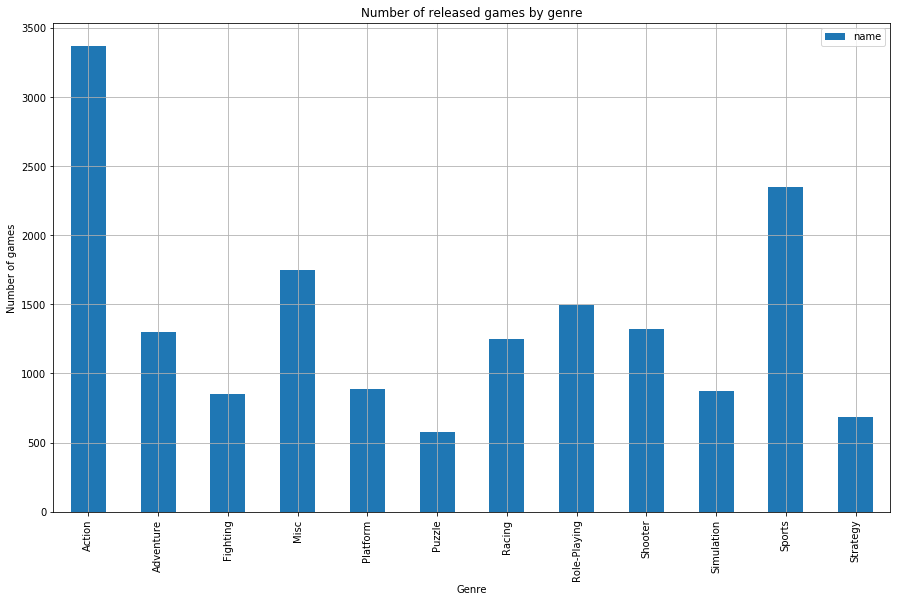

In [78]:
genres.plot(kind='bar', x='genre', y='name', figsize=(15,9),  grid=True)
plt.title('Number of released games by genre')
plt.xlabel('Genre')
plt.ylabel('Number of games')
plt.show() 

<b>What can we say about the most profitable genres? Can you generalize about genres with high and low sales?</b>

In [79]:
genres_sales = games[['total_sales','genre']].groupby('genre').sum().sort_values(by='total_sales').reset_index()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


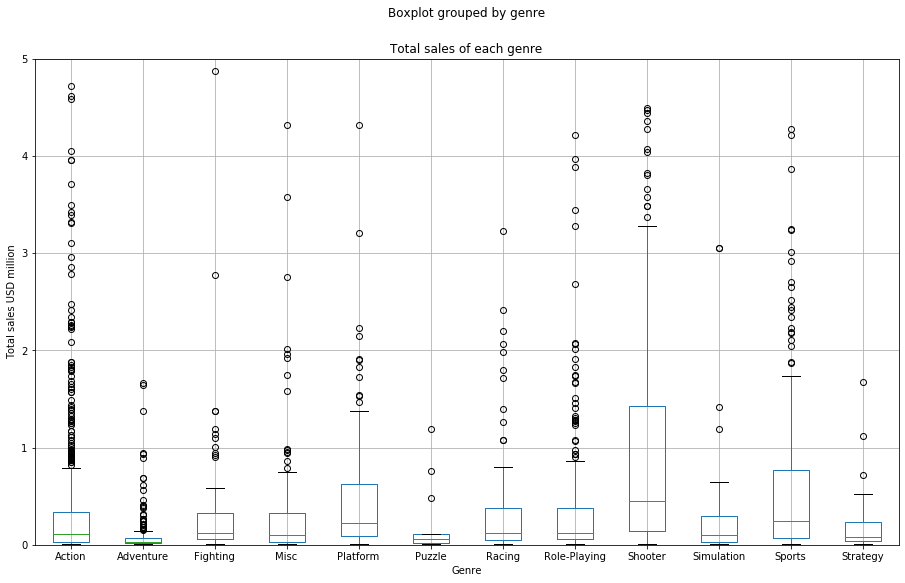

In [80]:
filltered_years.boxplot(by='genre', column='total_sales' ,figsize=(15,9))
plt.title('Total sales of each genre')
plt.xlabel('Genre')
plt.ylim(0,5)
plt.ylabel('Total sales USD million')
plt.show() 

The top 3 genres: shhoter, platform and sports
the buttom 3 genres: adventure, puzzle and srategy

## User profile for each region

### North America:

#### Sales by Platform

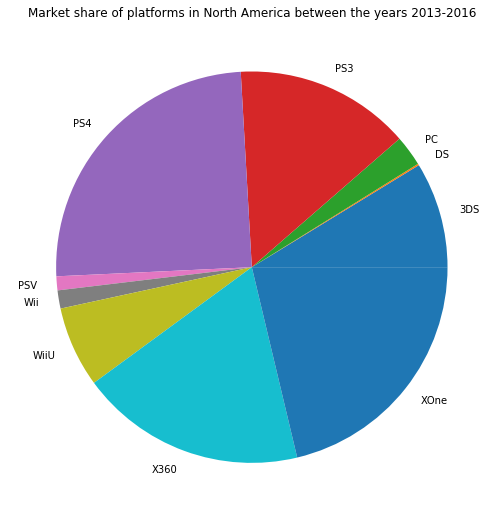

In [81]:
filltered_years[['na_sales', 'platform']].groupby('platform')['na_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Market share of platforms in North America between the years 2013-2016')
plt.show()

#### Sales by genre

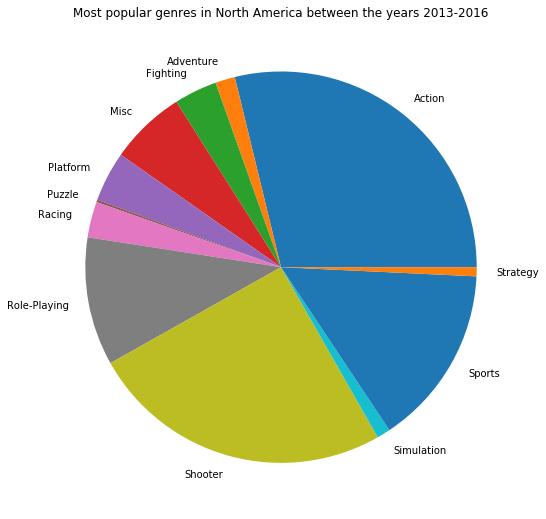

In [82]:
filltered_years[['na_sales', 'genre']].groupby('genre')['na_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Most popular genres in North America between the years 2013-2016')
plt.show()

#### Sales by level of rating

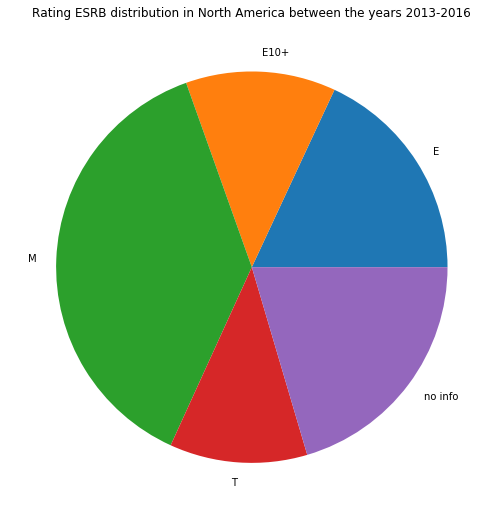

In [83]:
filltered_years[['na_sales', 'rating']].groupby('rating')['na_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Rating ESRB distribution in North America between the years 2013-2016')
plt.show()

### Europe

#### Sales by Platform

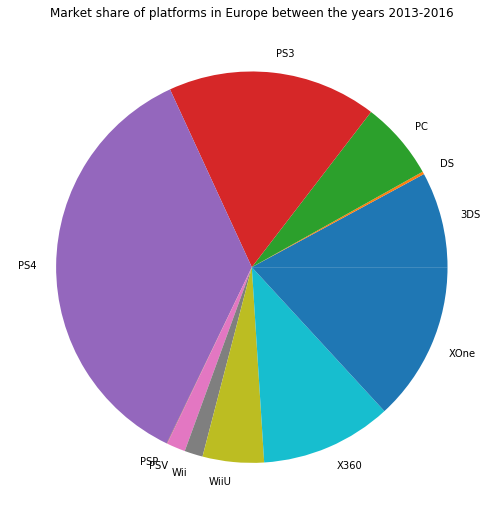

In [84]:
filltered_years[['eu_sales', 'platform']].groupby('platform')['eu_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Market share of platforms in Europe between the years 2013-2016')
plt.show()

#### Sales by genre

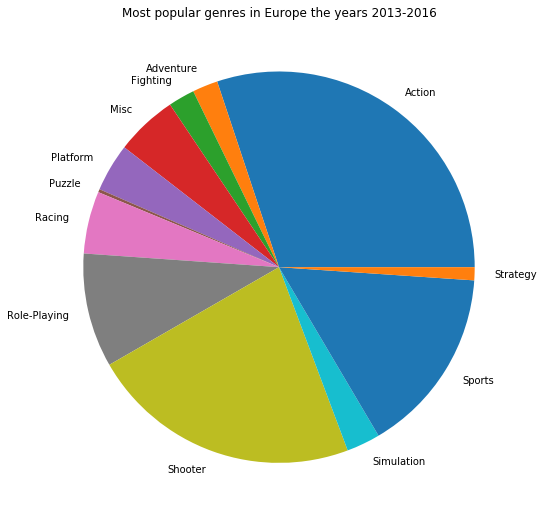

In [85]:
filltered_years[['eu_sales', 'genre']].groupby('genre')['eu_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Most popular genres in Europe the years 2013-2016')
plt.show()

#### Sales by lenel of rating

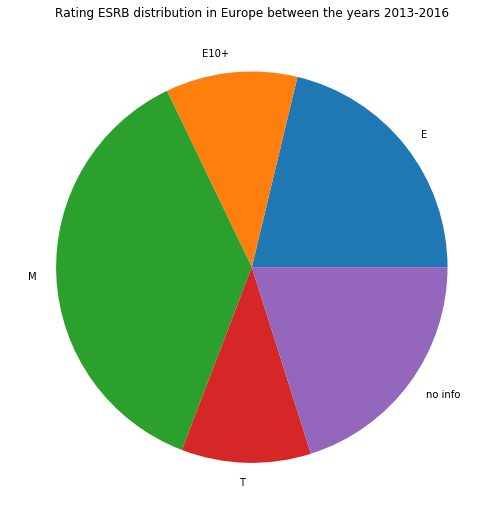

In [86]:
filltered_years[['eu_sales', 'rating']].groupby('rating')['eu_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Rating ESRB distribution in Europe between the years 2013-2016')
plt.show()

### Japan

#### Sales by Platform

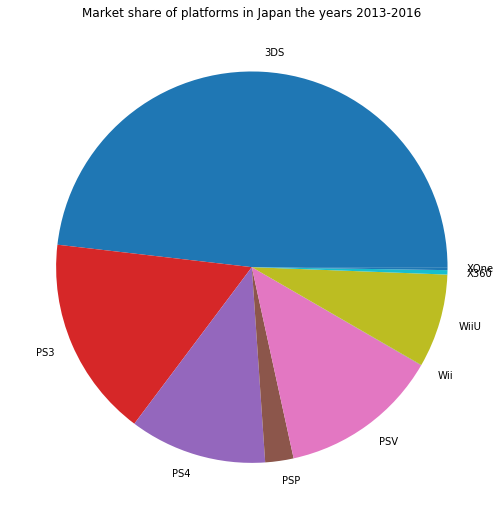

In [87]:
filltered_years[['jp_sales', 'platform']].groupby('platform')['jp_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Market share of platforms in Japan the years 2013-2016')
plt.show()

#### Sales by genre

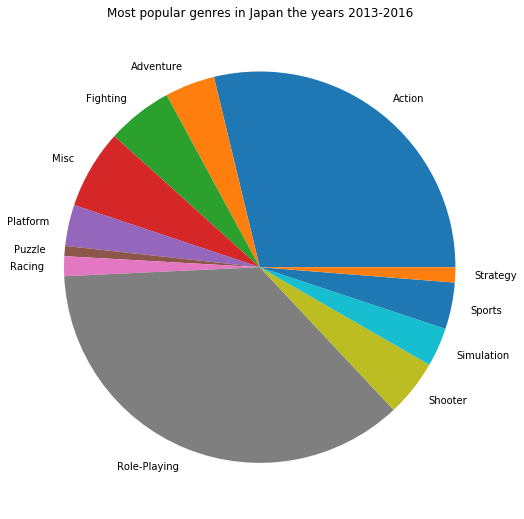

In [88]:
filltered_years[['jp_sales', 'genre']].groupby('genre')['jp_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Most popular genres in Japan the years 2013-2016')
plt.show()

#### Sales by lenel of rating

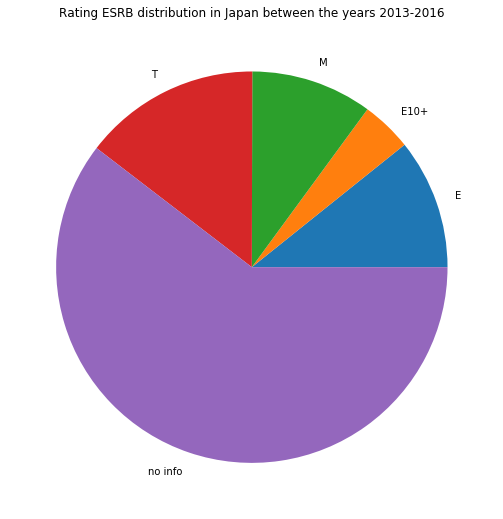

In [89]:
filltered_years[['jp_sales', 'rating']].groupby('rating')['jp_sales'].agg('sum').plot.pie(y='na_sales', figsize=(9,9))
plt.ylabel('')
plt.title('Rating ESRB distribution in Japan between the years 2013-2016')
plt.show()

## Testing hypotheses

In [90]:
test_data = filltered_years.query('user_score > 0')

### —Average user ratings of the Xbox One and PC platforms are the same.

H0:The average user scores of  Xbox is equal to the average of user scores of Pc
H1:The average user scores of  Xbox is not equal to the average of user scores of Pc


To check this, I used the test of independent samples.
I chose alpha=0.05 because I wanted a 95% confidence level.

In [91]:
sample_1 = test_data.query('platform == "XOne"').user_score
sample_2 = test_data.query('platform == "PC"').user_score
alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: The means of sample 1 and sample 2 are equal")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.14012658403611647
We can't reject the null hypothesis


### —Average user ratings for the Action and Sports genres are different.

H0:The average user scores of  the action genre is equal to the average user scores of  the sports genre
H1:The average user scores of  the action genre is not equal to the average user scores of  the sports genre

To check this, I used the test of independent samples.
I chose alpha=0.05 because I wanted a 95% confidence level.


In [92]:
sample_1 = test_data.query('genre == "Action"').user_score
sample_2 = test_data.query('genre == "Sports"').user_score
alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: The means of sample 1 and sample 2 are equal")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.0517832389140023e-27
We reject the null hypothesis: The means of sample 1 and sample 2 are equal


## Conclusion

Several conclusions can be drawn from the analysis:

The following genres are leading in sales: action, shooter and sports
The following platforms are leading in sales: XBox, PS4, XOne and PS3

Also, games that appeal to an older audience (and probably contain violent and / or sexual content) are more familiar by a considerable margin.

Scores of both  critics and users do not affect sales and can be ignored.

Different platforms are preferred in different regions of the world and this should be taken into account.

